In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

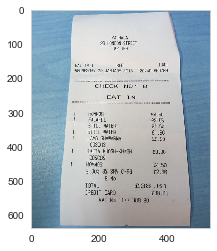

In [2]:
imagem = mpimg.imread("nota-fiscal.png")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


637 526


Text(0.5,1,'Portal com Marcadores')

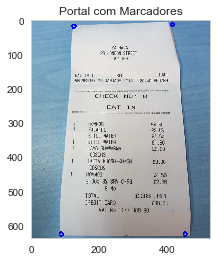

In [10]:
height, width = imagem.shape[:2]

imagem_marcadores = imagem.copy()

print(height, width)

pontos_marcadores = np.float32([[125,18],[413,13],[88,625],[450,625]])
pontos_destino = np.float32([[0,0],[800,0],[0,600],[800,600]])

# Adicionando marcadores para visualizar os pontos que serão expandidos
color = (0, 0, 255)

cv2.circle(imagem_marcadores, (125,18), 5, color, 3)
cv2.circle(imagem_marcadores, (413,13), 5, color, 3)
cv2.circle(imagem_marcadores, (88,625), 5, color, 3)
cv2.circle(imagem_marcadores, (450,625), 5, color, 3)

plt.imshow(imagem_marcadores)
plt.title("Portal com Marcadores")

Text(0.5,1,'Portal com Marcadores')

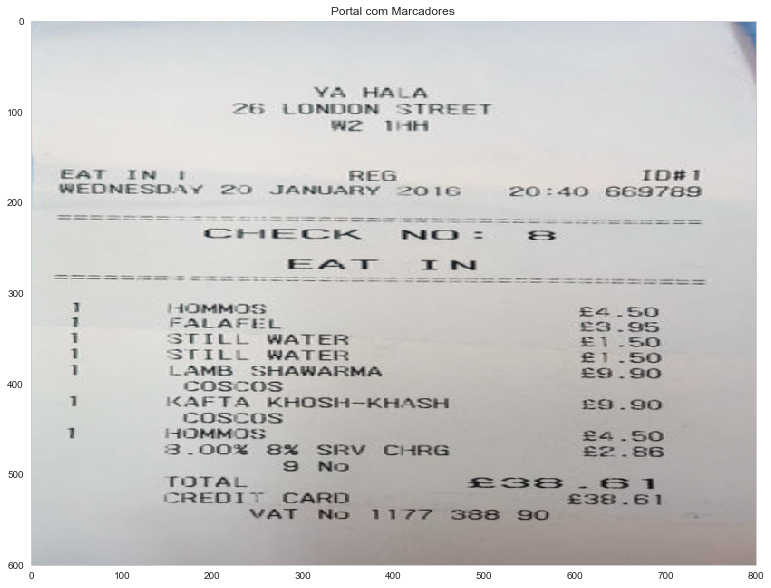

In [11]:
# Realizando a transformação não afim

matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcadores, pontos_destino)
imagem_transformada = cv2.warpPerspective(imagem,matriz_perspectiva,(800,600))

plt.figure(figsize=(20,10))
plt.imshow(imagem_transformada)
plt.title("Portal com Marcadores")